In [13]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import random

# Create Dataset

In [14]:
english=[]
dutch=[]
with open("data/data.txt","r",encoding="utf-8")as f:
    for i in f.readlines():
        if i.split("|")[0]=="en":
            english.append(i.split("|")[1])
        else:
            dutch.append(i.split("|")[1])
train=[]
for i in english:
    train.append([i,0])
for i in dutch:
    train.append([i,1])
random.shuffle(train)
x=[]
y=[]
for i,j in train:
    x.append(i)
    y.append(j)
x=np.array(x)
y=np.array(y)
language_labels=["English","Dutch"]

# Create Tokenizer Instance

In [15]:
token=tf.keras.preprocessing.text.Tokenizer(1000,oov_token="<OOV>")
token.fit_on_texts(x)
sequences=token.texts_to_sequences(x)
padded_sequences=tf.keras.preprocessing.sequence.pad_sequences(sequences,padding="post",truncating="post",maxlen=100)

# Create Model

In [16]:
model=tf.keras.models.Sequential([
    tf.keras.layers.Embedding(len(token.word_index)+1,2,input_length=100),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(128,activation="relu"),
    tf.keras.layers.Dense(2,activation="softmax")
])

# Get Summary Of Model

In [17]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 100, 2)            11338     
                                                                 
 bidirectional_1 (Bidirectio  (None, 128)              34304     
 nal)                                                            
                                                                 
 dense_2 (Dense)             (None, 128)               16512     
                                                                 
 dense_3 (Dense)             (None, 2)                 258       
                                                                 
Total params: 62,412
Trainable params: 62,412
Non-trainable params: 0
_________________________________________________________________


# Compile The Model

In [18]:
model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

# Train The Model

In [19]:
history=model.fit(padded_sequences,y,epochs=30,validation_split=0.1)

Epoch 1/30
31/31 [==============================] - 8s 117ms/step - loss: 0.6735 - accuracy: 0.6528 - val_loss: 0.6540 - val_accuracy: 0.4112
Epoch 2/30
31/31 [==============================] - 8s 266ms/step - loss: 0.3863 - accuracy: 0.8773 - val_loss: 0.0706 - val_accuracy: 0.9907
Epoch 3/30
31/31 [==============================] - 9s 289ms/step - loss: 0.1532 - accuracy: 0.9761 - val_loss: 0.0917 - val_accuracy: 1.0000
Epoch 4/30
31/31 [==============================] - 8s 264ms/step - loss: 0.0485 - accuracy: 0.9969 - val_loss: 0.0344 - val_accuracy: 1.0000
Epoch 5/30
31/31 [==============================] - 10s 331ms/step - loss: 0.0169 - accuracy: 1.0000 - val_loss: 0.0212 - val_accuracy: 0.9907
Epoch 6/30
31/31 [==============================] - 9s 295ms/step - loss: 0.0086 - accuracy: 1.0000 - val_loss: 0.0163 - val_accuracy: 0.9907
Epoch 7/30
31/31 [==============================] - 8s 247ms/step - loss: 0.0050 - accuracy: 1.0000 - val_loss: 0.0115 - val_accuracy: 1.0000
Epoch

# Accuracy Graph

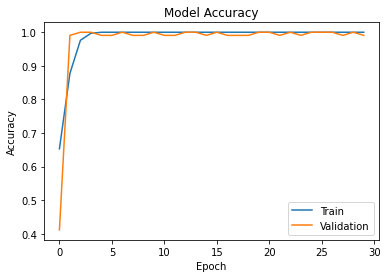

In [20]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Train","Validation"],loc="best")

# Loss Graph

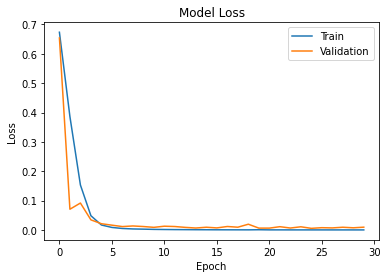

In [21]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Model Loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["Train","Validation"],loc="best")

# Predict On Test Sentences

In [30]:
test_sentences=["hi bro, my name is abhimanyu. nice to meet you! im a programmer and i created this NLP model to classify that a given sentence is in English or Dutch","hallo bro, mijn naam is abhimanyu. Aangenaam! ik ben een programmeur en ik heb dit NLP-model gemaakt om te classificeren dat een bepaalde zin in het Engels of Nederlands is"]
token.fit_on_texts(test_sentences)
sequences=token.texts_to_sequences(test_sentences)
test_padded_sequences=tf.keras.preprocessing.sequence.pad_sequences(sequences,maxlen=100,padding="post",truncating="post")
give_label=[np.round(i) for i in model.predict(test_padded_sequences)]
detected_language=[]
confidences=[]
for i in give_label:
    detected_language.append(language_labels[i.argmax()])
for i in model.predict(test_padded_sequences):
    confidences.append(i)
for j,i in enumerate(detected_language):
    print(f"Detected {i} Language In Sentence {j} With Confidence {np.max(confidences[j])}")

1/1 [==============================] - 0s 31ms/step
Detected English Language In Sentence 0 With Confidence 0.903361439704895
Detected Dutch Language In Sentence 1 With Confidence 0.9999831914901733


# Save The Model

In [23]:
model.save("classifier.h5")